In [1]:
%matplotlib inline

In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np

# Read CSV Files in Data Frames and Merge

In [3]:
# File to load
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [4]:
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   float64
dtypes: float64(2), object(2)
memory usage: 74.3+ KB


In [5]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [6]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [7]:
sum(city_data_df["type"]=="Suburban")

36

In [8]:
sum(city_data_df["type"]=="Rural")

18

In [9]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, on='city').set_index('city')
pyber_data_df.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
Lake Jonathanshire,4/7/2019 20:51,31.25,4.441250e+12,5,Urban
Lake Jonathanshire,3/9/2019 23:45,19.89,2.389500e+12,5,Urban
Lake Jonathanshire,4/7/2019 18:09,24.28,7.796810e+12,5,Urban
Lake Jonathanshire,1/2/2019 14:14,13.89,4.242550e+11,5,Urban


In [10]:
# Create the Urban City DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type'] == "Urban"]
urban_cities_df.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
Lake Jonathanshire,4/7/2019 20:51,31.25,4.441250e+12,5,Urban
Lake Jonathanshire,3/9/2019 23:45,19.89,2.389500e+12,5,Urban
Lake Jonathanshire,4/7/2019 18:09,24.28,7.796810e+12,5,Urban
Lake Jonathanshire,1/2/2019 14:14,13.89,4.242550e+11,5,Urban


In [11]:
# Create the suburban and rural Cities DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df['type'] == "Rural"]

In [12]:
suburban_cities_df.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
Barronchester,5/5/2019 4:03,30.38,2.281520e+12,11,Suburban
Barronchester,4/25/2019 19:11,36.13,2.660180e+12,11,Suburban
Barronchester,3/31/2019 6:05,44.24,1.252890e+12,11,Suburban
Barronchester,3/2/2019 23:36,36.49,4.031570e+12,11,Suburban


In [13]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [14]:
# Get the number of rides for suburban and rural cities.
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [15]:
# Get average fare for each city in urban cities
urban_ride_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_ride_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

# Create Bubble Chart

In [16]:
# Get average fare for each city in the suburban and rural cities
suburban_ride_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_ride_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

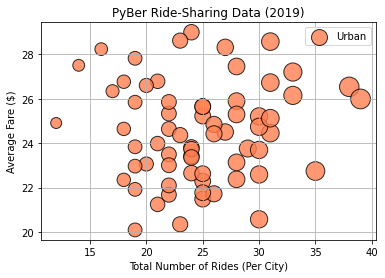

In [17]:
# Urban Scatter Chart
plt.scatter(urban_ride_count, urban_ride_avg_fare,   s=10*urban_ride_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

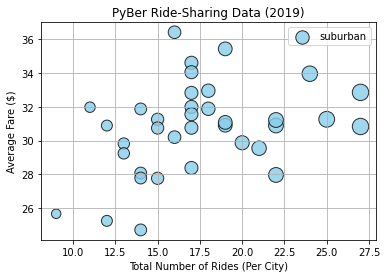

In [18]:
#Suburban scatter chart
plt.scatter(suburban_ride_count, suburban_ride_avg_fare, c='skyblue', s= 10*suburban_ride_count,
      edgecolor="black", linewidths=1, alpha=0.8, label="suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

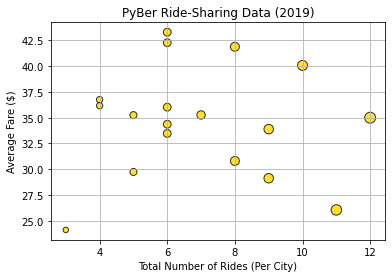

In [19]:
# Rural Scatter Chart
plt.scatter(rural_ride_count, rural_ride_avg_fare, c= 'gold', s= 10*rural_ride_count,
           edgecolor='black', linewidths=1, alpha=0.80, label ='rural')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend

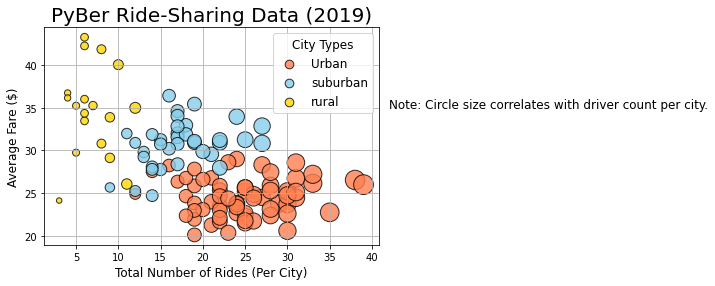

In [20]:
plt.scatter(urban_ride_count, urban_ride_avg_fare,   s=10*urban_ride_count, c="coral",
      edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_ride_avg_fare, c='skyblue', s= 10*suburban_ride_count,
      edgecolor="black", linewidths=1, alpha=0.8, label="suburban")

plt.scatter(rural_ride_count, rural_ride_avg_fare, c= 'gold', s= 10*rural_ride_count,
           edgecolor='black', linewidths=1, alpha=0.80, label ='rural')

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize='12', mode="Expanded", scatterpoints= 1, loc="best", title= 'City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure

plt.savefig("Fig1.png")
# Show the plot
plt.show()



# Statistical summary

In [21]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [22]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [23]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [24]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [25]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [26]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [27]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [28]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [30]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode(),suburban_ride_count.mode(),rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

# Measures of central tendency for ride count by city type

In [31]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [39]:
 # Calculate the measures of central tendency for the ride count for the urban, suburban, rural cities.
print('Measures of central tendency for the ride count for the urban cities')
    
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
print('-'*20)
print('Measures of central tendency for the ride count for the suburban cities')
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.')
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

print('-'*20)
print('Measures of central tendency for the ride count for the rural cities')
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")


Measures of central tendency for the ride count for the urban cities
The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
--------------------
Measures of central tendency for the ride count for the suburban cities
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
--------------------
Measures of central tendency for the ride count for the rural cities
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


# Measures of central tendency for the average fare by city type

In [40]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df['fare']
urban_fares.head()

city
Lake Jonathanshire    13.83
Lake Jonathanshire    31.25
Lake Jonathanshire    19.89
Lake Jonathanshire    24.28
Lake Jonathanshire    13.89
Name: fare, dtype: float64

In [42]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [46]:
# Get the fares for the suburban cities
suburban_fares = suburban_cities_df['fare']

#Calculate the measures of cental tendency for the average fares for suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare for suburban trips is ${mean_suburban_fares:.2f}.')
median_suburban_fares = np.median(suburban_fares)
print(f'The median fare for suburban trips is ${median_suburban_fares:.2f}.')
mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode fare for suburban trips is {mode_suburban_fares}.') 

The mean fare for suburban trips is $30.97.
The meadian fare for suburban trips is $30.75.
The mode fare for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [47]:
# Get the fares for the rural cities
rural_fares = rural_cities_df['fare']

#Calculate the measures of cental tendency for the average fares for suburban cities
mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare for rural trips is ${mean_rural_fares:.2f}.')
median_rural_fares = np.median(rural_fares)
print(f'The median fare for rural trips is ${median_rural_fares:.2f}.')
mode_rural_fares = sts.mode(rural_fares)
print(f'The mode fare for rural trips is {mode_rural_fares}.')

The mean fare for rural trips is $34.62.
The meadian fare for rural trips is $37.05.
The mode fare for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


# Measures of central tendency for Driver Count by city type

In [ ]:
# Get the Driver count for the urban, suburban and rural cities

urban_driver_count = urban_cities_df.groupby('city').mean()['driver_count']

suburban_driver_count = suburban_cities_df.groupby('city').mean()['driver_count']

rural_driver_count = rural_cities_df.groupby('city').mean()['driver_count']

In [60]:
#Calculate the measures of central tendency for driver count for Urban cities
mean_urban_driver_count = np.mean(urban_driver_count)
print(f'The mean driver count for urban cities is {mean_urban_driver_count:.0f}.')
median_urban_driver_count = np.median(urban_driver_count)
print(f'The median driver count for urban cities {median_urban_driver_count:.0f}.')
mode_urban_driver_count = sts.mode(urban_driver_count)
print(f'The mode driver count for urban cities {mode_urban_driver_count}.') 

The mean driver count for urban cities is 36.
The median driver count for urban cities 37.
The mode driver count for urban cities ModeResult(mode=array([25], dtype=int64), count=array([4])).


In [59]:
#Calculate the measures of cental tendency for driver count for suburban cities
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f'The mean driver count for suburban cities is {mean_suburban_driver_count:.0f}.')
median_suburban_driver_count = np.median(suburban_driver_count)
print(f'The median driver count for suburban cities {median_suburban_driver_count:.0f}.')
mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f'The mode driver count for suburban cities {mode_suburban_driver_count}.') 

The mean driver count for suburban cities is 14.
The median driver count for suburban cities 15.
The mode driver count for suburban cities ModeResult(mode=array([20], dtype=int64), count=array([5])).


In [58]:
#Calculate the measures of cental tendency for driver count for rural cities
mean_rural_driver_count = np.mean(rural_driver_count)
print(f'The mean driver count for rural cities is {mean_rural_driver_count:.0f}.')
median_rural_driver_count = np.median(rural_driver_count)
print(f'The median driver count for rural cities {median_rural_driver_count:.0f}.')
mode_rural_driver_count = sts.mode(rural_driver_count)
print(f'The mode driver count for rural cities {mode_rural_driver_count}.') 

The mean driver count for rural cities is 4.
The median driver count for rural cities 4.
The mode driver count for rural cities ModeResult(mode=array([1], dtype=int64), count=array([5])).


# Box and Whisker plots for ride count

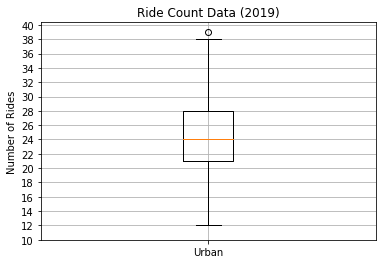

In [62]:
# Create a box and whisker plot for the urban cities ride count
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step =2.0))
ax.grid()
plt.show()


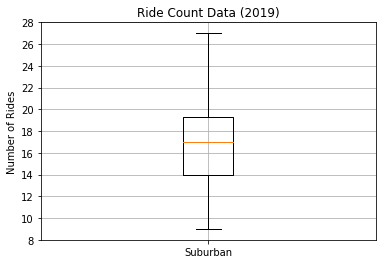

In [71]:
# Create a box and whisker plot for the suburban cities ride count
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# add the title, y axis lable and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8, 30, step =2.0))
ax.grid()
plt.show()

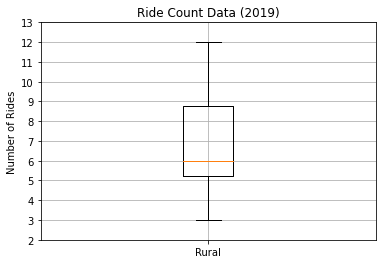

In [70]:
# Create a box and whisker plot for the rural cities ride count
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# add the title, y axis lable and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 14, step =1.0))
ax.grid()
plt.show()

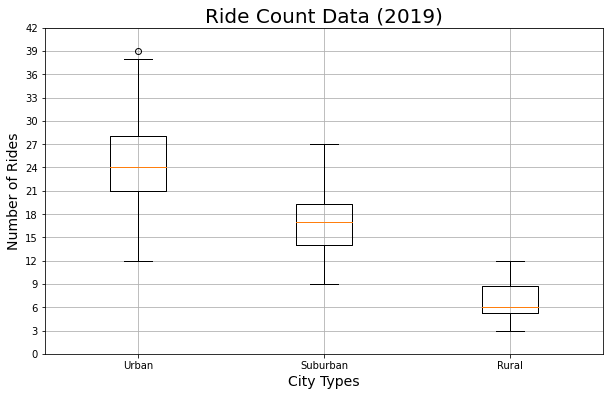

In [72]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Fig2.png")
plt.show()

In [74]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count ==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


# Box and Whisker plots for ride fare data (2019)

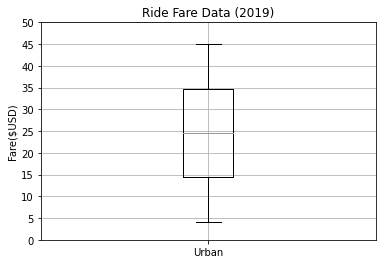

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [82]:
# Create a box and whsikers plot for the urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

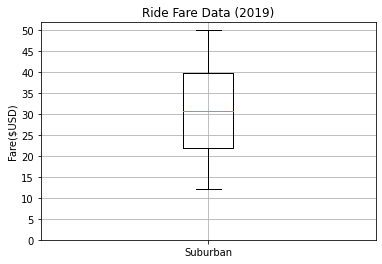

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [83]:
# Create a box and whsikers plot for the suburban fare data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

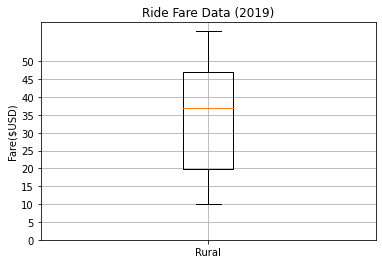

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [84]:
# Create a box and whsikers plot for the rural fare data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

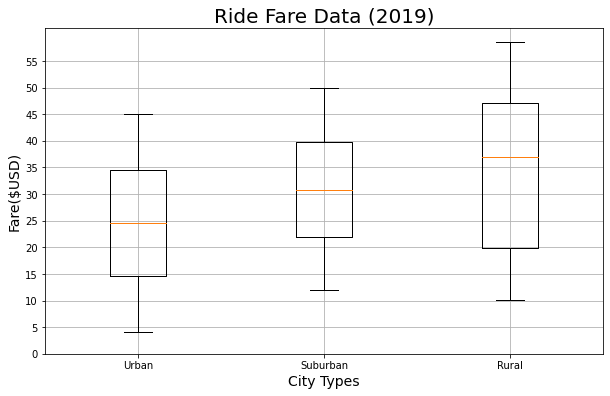

In [97]:
# Create a box and whsikers plot for the urban fare data
x_labels = ["Urban", "Suburban", "Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(fares_data, labels = x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("Fig3.png")
plt.show()


# Box and Whisker plots for Driver Count Data

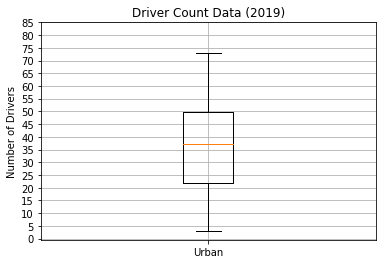

Summary Statistics


count    66.000000
mean     36.439394
std      19.827819
min       3.000000
25%      22.000000
50%      37.000000
75%      49.750000
max      73.000000
Name: driver_count, dtype: float64

In [106]:
# Create a box and whsikers plot for the urban driver count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_driver_count, labels = x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_driver_count.describe()

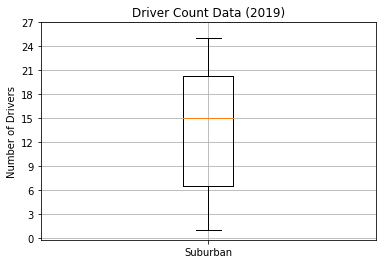

Summary Statistics


count    36.000000
mean     13.611111
std       8.022389
min       1.000000
25%       6.500000
50%      15.000000
75%      20.250000
max      25.000000
Name: driver_count, dtype: float64

In [107]:
# Create a box and whsikers plot for the suburban driver count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_driver_count, labels = x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 30, step=3.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_driver_count.describe()

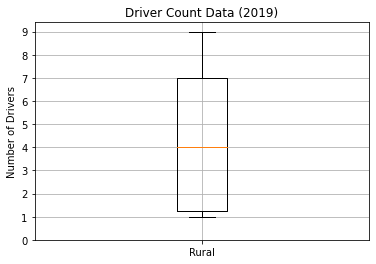

Summary Statistics


count    18.000000
mean      4.333333
std       2.828427
min       1.000000
25%       1.250000
50%       4.000000
75%       7.000000
max       9.000000
Name: driver_count, dtype: float64

In [110]:
# Create a box and whsikers plot for the rural driver count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_driver_count, labels = x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_driver_count.describe()

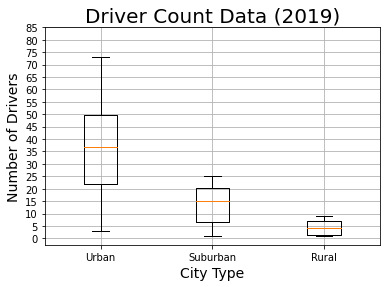

In [112]:
# Create a box and whsikers plot for the urban, suburban and rural  driver count
x_labels = ["Urban", "Suburban","Rural"]
drivers_count = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots()
ax.boxplot(drivers_count, labels = x_labels)
ax.set_title('Driver Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Drivers', fontsize = 14)
ax.set_xlabel('City Type', fontsize = 14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig("fig4.png")
plt.show()
